# HR Analytics Project- Understanding the Attrition in HR
Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 

Note: You can find the dataset in the link below.

Downlaod Files:
https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import our dataset
data = pd.read_csv(r"C:\Users\HP\Desktop\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
# first 10 observations of our dataset
data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [4]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null values in the data.

In [5]:
data.shape

(1470, 35)

In [6]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

We will replace the values in columns of Education with the detailed values for better understanding.

In [7]:
data['Education'].unique()

array([2, 1, 4, 3, 5], dtype=int64)

In [8]:
data['Education'] = data['Education'].replace([1,2,3,4,5],['Below College','College', 'Bachelor', 'Master', 'Doctor']) #demarcating each value with an information

Now lets find the age distribution

In [9]:
data['age_decade'] = data['Age']//10*10

data = data.assign(Age_decade = data['age_decade'])

In [10]:
data['age_decade'] = data['age_decade'].replace([10.0, 20.0, 30.0, 40.0, 50.0, 60.0],['10s','20s', '30s', '40s', '50s', '60s'])

In [11]:
data['age_decade'].shape

(1470,)

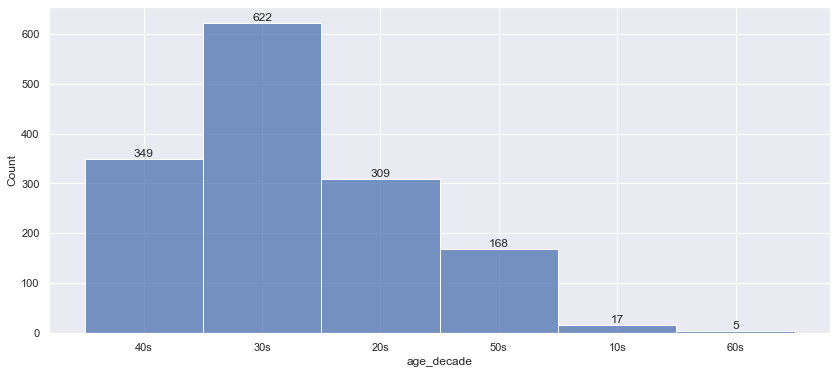

In [12]:
plt.figure(figsize=(14,6))
sns.set_theme(style = 'darkgrid')
ax = sns.histplot(data = data, x = data["age_decade"], binwidth = 10, palette = 'rocket')
for i in ax.containers:
        ax.bar_label(i,)

So, here we converted the age into their resp. decades and then added those values in a seperate column

# Data visualization

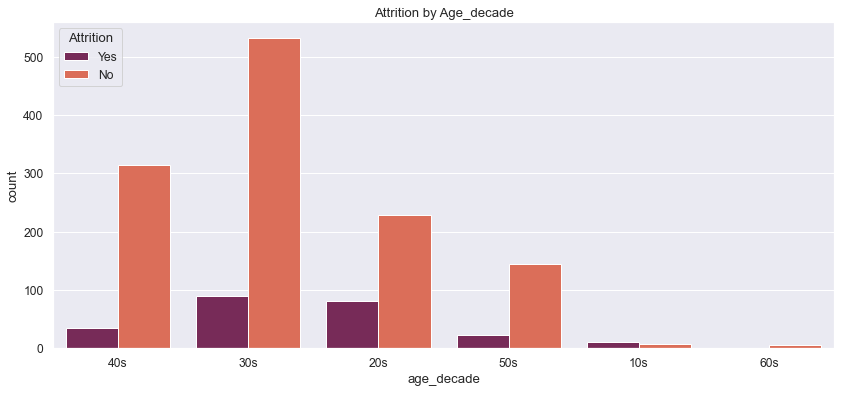

In [13]:
plt.figure(figsize=(14,6))
sns.set_theme(style="darkgrid", font_scale = 1.1)
g =sns.countplot(data=data, x='age_decade', hue='Attrition', palette='rocket').set_title('Attrition by Age_decade');

The above graph shows Attrition by age group

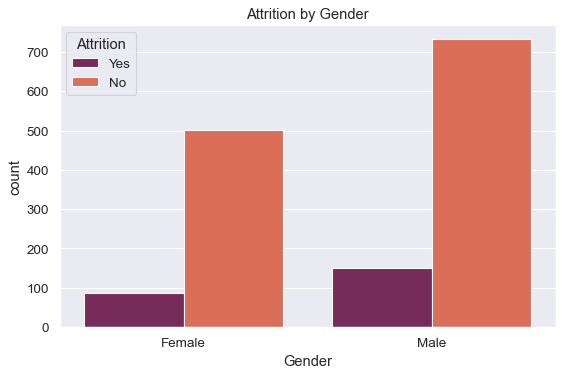

In [14]:
plt.figure(figsize=(8,5), dpi=80)
sns.set_theme(style="darkgrid", font_scale = 1.1)
sns.countplot(data=data, x='Gender', hue='Attrition', palette='rocket').set_title('Attrition by Gender');

The above graph shows Attrition by Gender

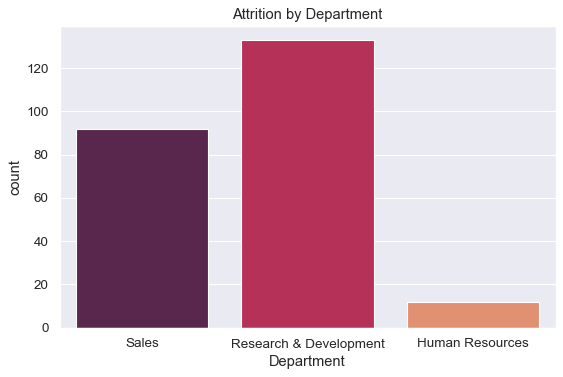

In [15]:
plt.figure(figsize=(8,5), dpi=80)
sns.set_theme(style="darkgrid", font_scale = 1.1)
ax = sns.countplot(data=data[(data['Attrition'] == 'Yes')], x='Department', palette='rocket').set_title('Attrition by Department');

The above graph shows Attrition by Department

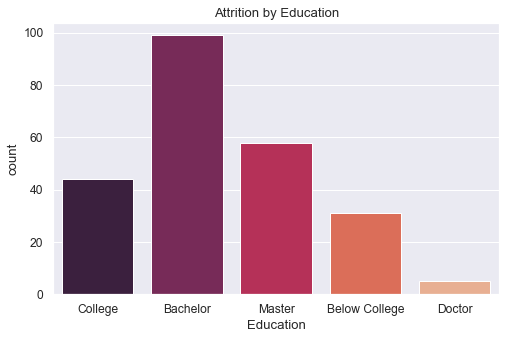

In [16]:
plt.figure(figsize=(8,5))
sns.set_theme(style="darkgrid", font_scale = 1.1)
sns.countplot(data=data[(data['Attrition'] == 'Yes')], x='Education',palette='rocket').set_title('Attrition by Education');

The above graph shows Attrition by education

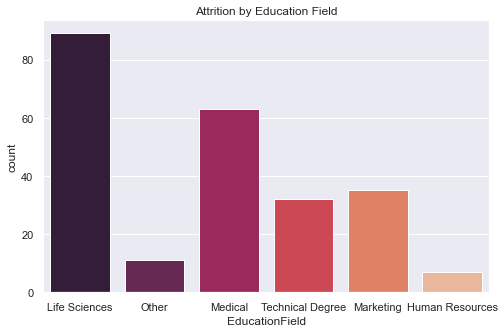

In [17]:
plt.figure(figsize=(8,5))
sns.set_theme(style="darkgrid", font_scale = 1)
sns.countplot(data=data[(data['Attrition'] == 'Yes')], x='EducationField',palette='rocket').set_title('Attrition by Education Field');

The above graph shows Attrition by education field

Now that we have compared attrition with different employee data, lets also compare the data of the employees who left the organisation with the ones who didn't

We will create two dataframes first, one of the employees who left the company and other with employees who didn't

In [18]:
data["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

We will name the dataframe for the employees who left the company as data_left

In [19]:
data_left =  data.loc[data['Attrition'] == 'Yes']

In [20]:
data_left.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,age_decade,Age_decade
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,...,0,8,0,1,6,4,0,5,40s,40
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,...,0,7,3,3,0,0,0,0,30s,30
14,28,Yes,Travel_Rarely,103,Research & Development,24,Bachelor,Life Sciences,1,19,...,0,6,4,3,4,2,0,3,20s,20
21,36,Yes,Travel_Rarely,1218,Sales,9,Master,Life Sciences,1,27,...,0,10,4,3,5,3,0,3,30s,30
24,34,Yes,Travel_Rarely,699,Research & Development,6,Below College,Medical,1,31,...,0,8,2,3,4,2,1,3,30s,30


We will name the dataframe who did not leave the company as data_present

In [21]:
data_present = data[data['Attrition'] == 'No']

In [22]:
data_present.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,age_decade,Age_decade
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,...,1,10,3,3,10,7,1,7,40s,40
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,...,0,8,3,3,8,7,3,0,30s,30
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,...,1,6,3,3,2,2,2,2,20s,20
5,32,No,Travel_Frequently,1005,Research & Development,2,College,Life Sciences,1,8,...,0,8,2,2,7,7,3,6,30s,30
6,59,No,Travel_Rarely,1324,Research & Development,3,Bachelor,Medical,1,10,...,3,12,3,2,1,0,0,0,50s,50


Now we will compare certain factors and try to find out the possible reasons of attrition.

In [23]:
jobsatisfaction_left = data_left[['JobSatisfaction', 'RelationshipSatisfaction', 'EnvironmentSatisfaction', 'WorkLifeBalance' ]]

In [24]:
jobsatisfaction_left.describe()

,JobSatisfaction,RelationshipSatisfaction,EnvironmentSatisfaction,WorkLifeBalance
count,237.000000,237.000000,237.000000,237.000000
mean,2.468354,2.599156,2.464135,2.658228
std,1.118058,1.125437,1.169791,0.816453
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,3.000000,4.000000,4.000000,3.000000
max,4.000000,4.000000,4.000000,4.000000


In [25]:
jobsatisfaction_present = data_present[['JobSatisfaction', 'RelationshipSatisfaction', 'EnvironmentSatisfaction', 'WorkLifeBalance' ]]

In [26]:
jobsatisfaction_present.describe()

,JobSatisfaction,RelationshipSatisfaction,EnvironmentSatisfaction,WorkLifeBalance
count,1233.000000,1233.000000,1233.000000,1233.000000
mean,2.778589,2.733982,2.771290,2.781022
std,1.093277,1.071603,1.071132,0.681907
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,3.000000
max,4.000000,4.000000,4.000000,4.000000


In [27]:
data_left['JobSatisfaction'].value_counts()

3    73
1    66
4    52
2    46
Name: JobSatisfaction, dtype: int64

In [28]:
data_present['JobSatisfaction'].value_counts()

4    407
3    369
2    234
1    223
Name: JobSatisfaction, dtype: int64

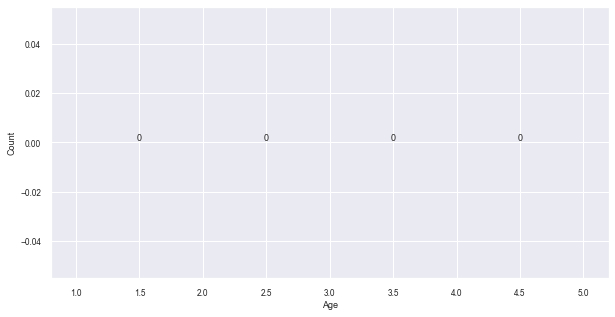

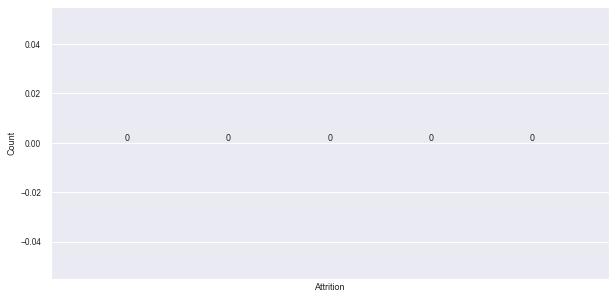

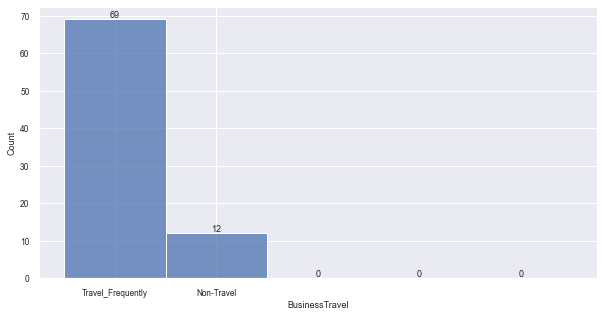

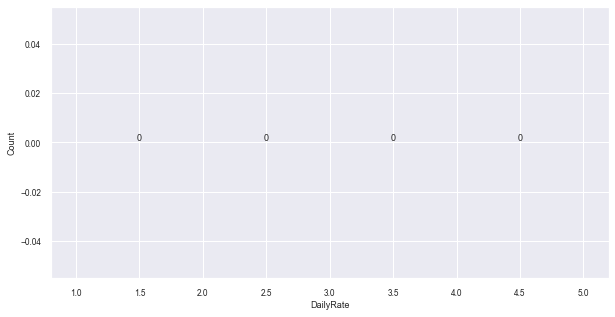

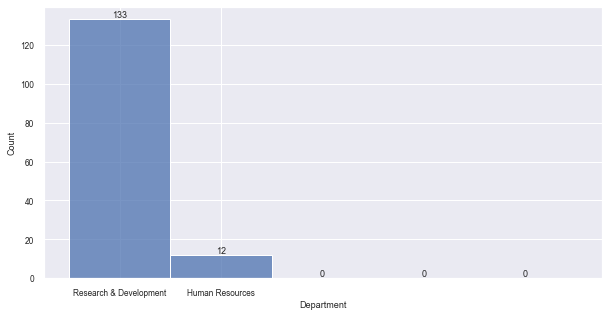

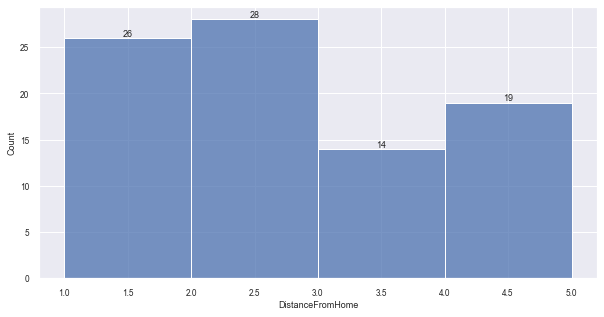

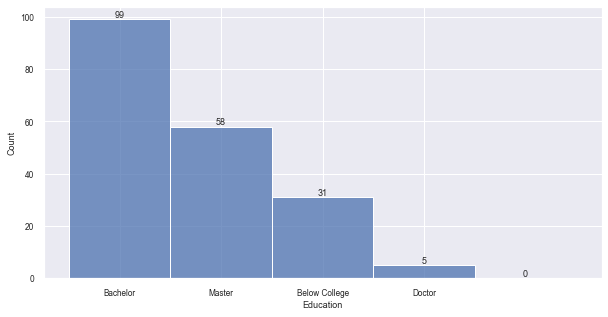

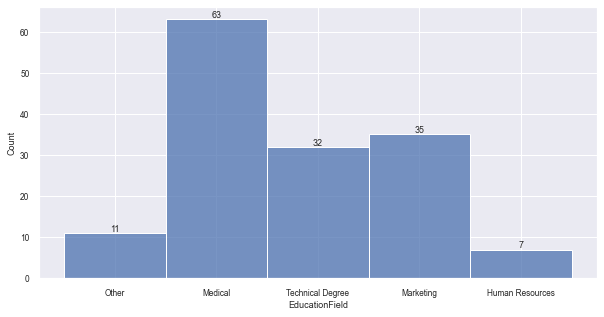

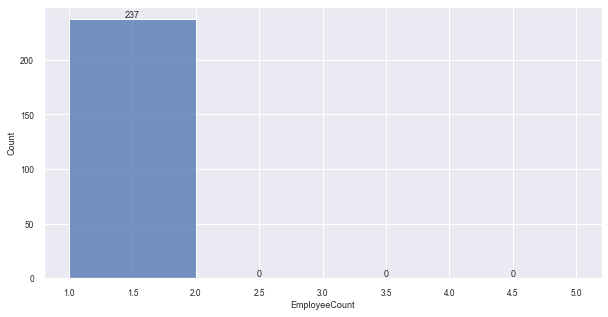

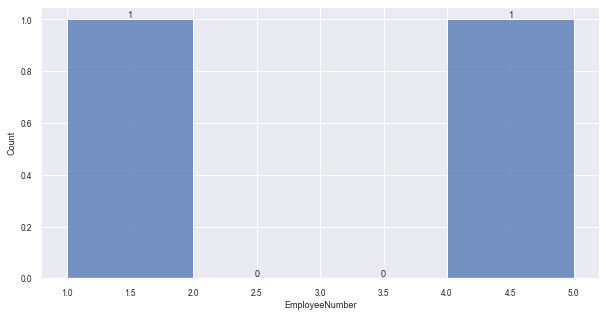

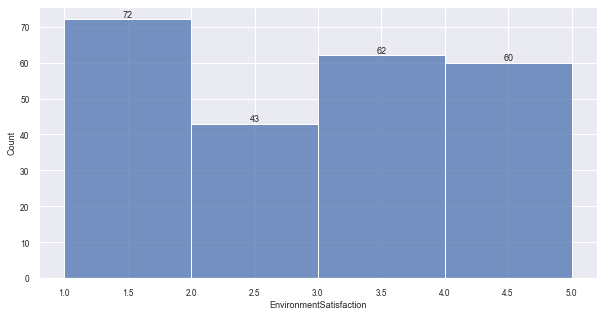

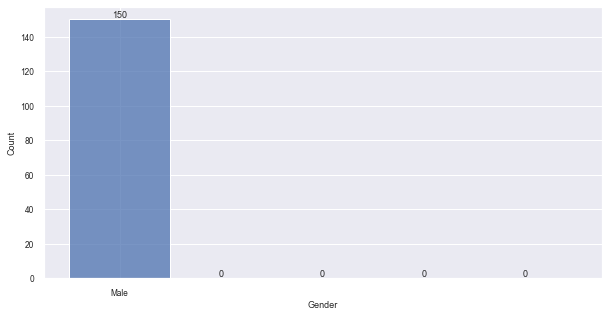

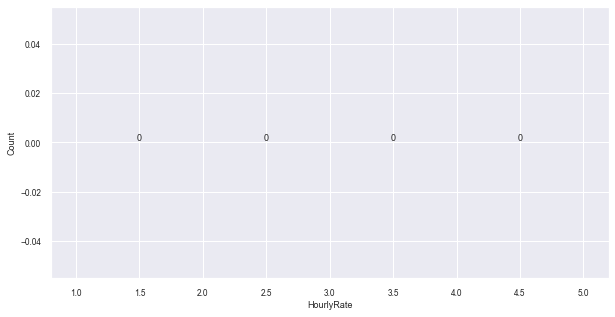

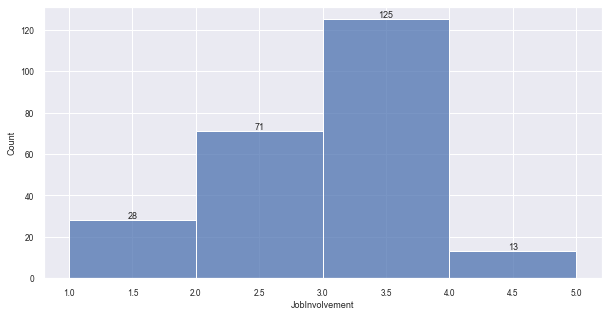

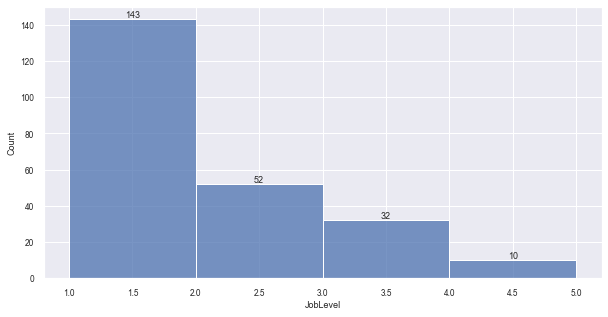

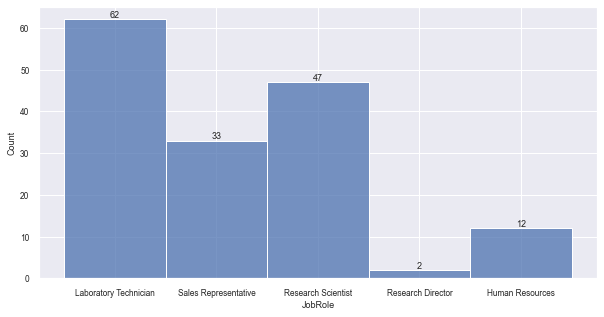

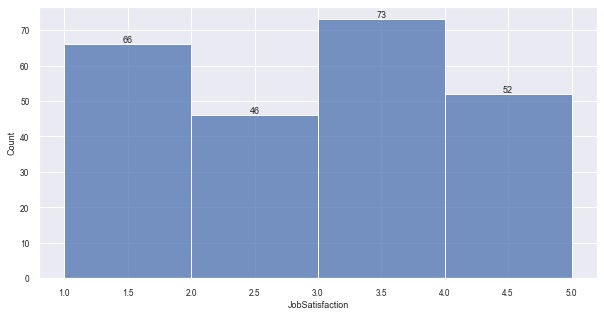

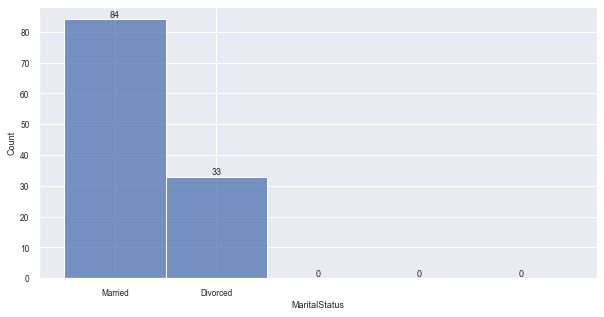

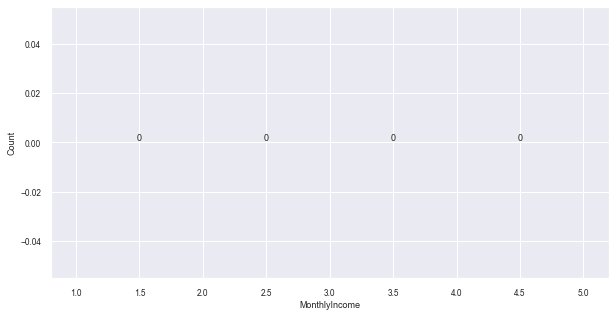

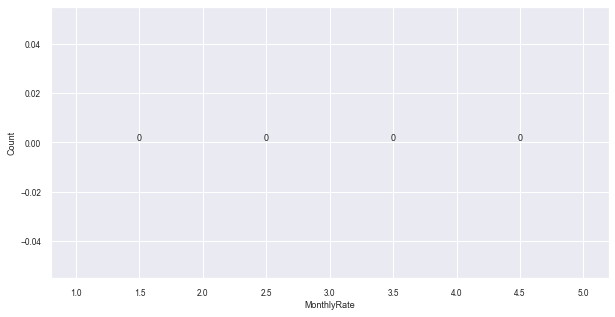

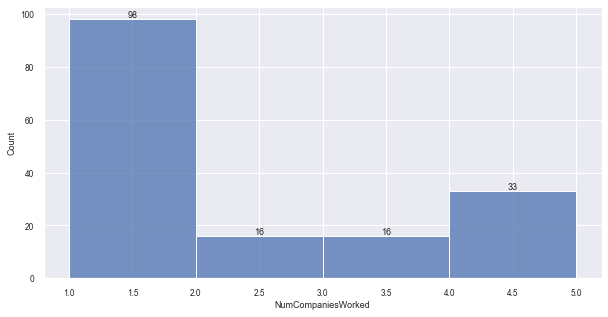

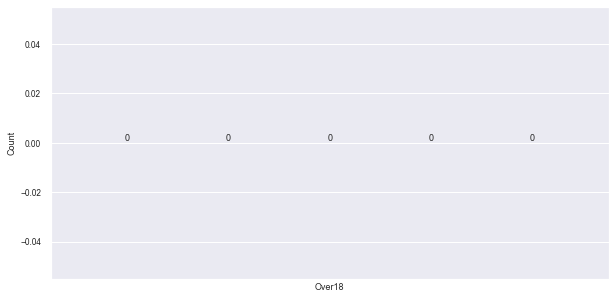

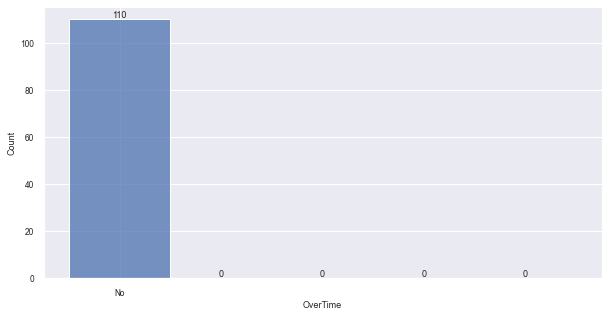

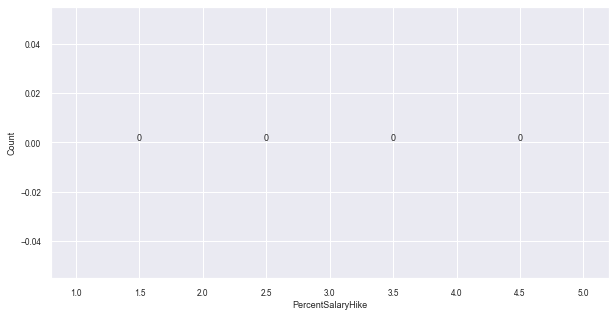

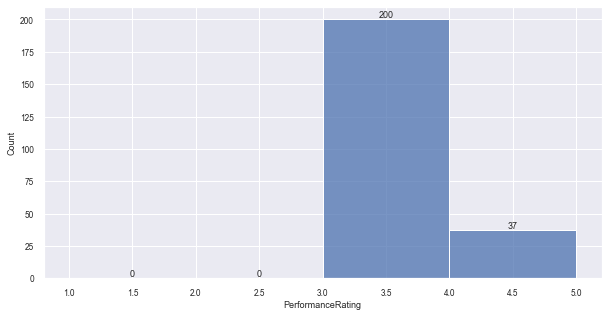

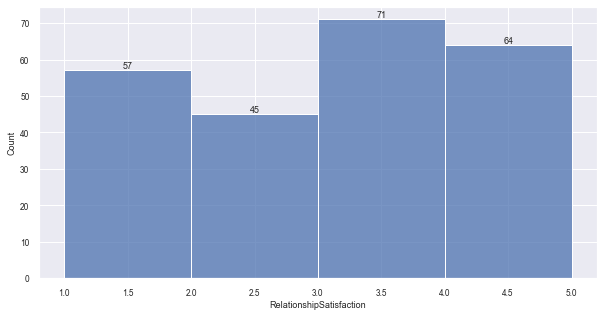

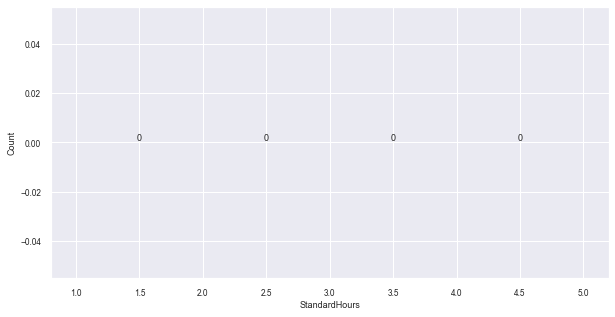

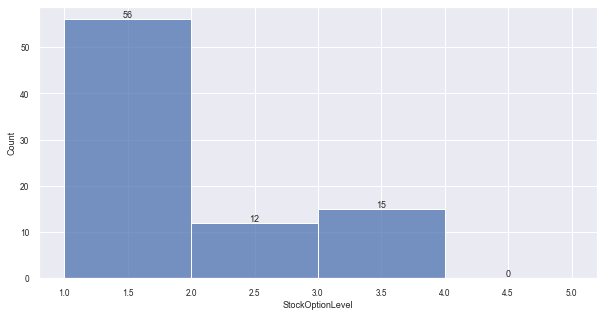

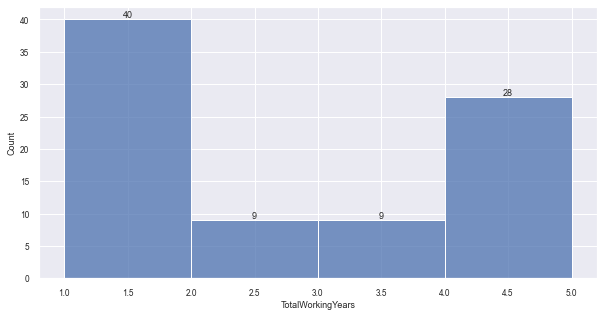

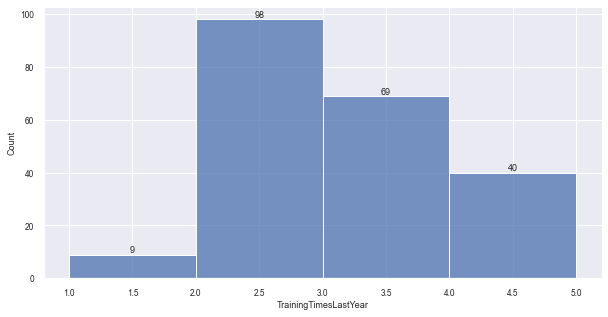

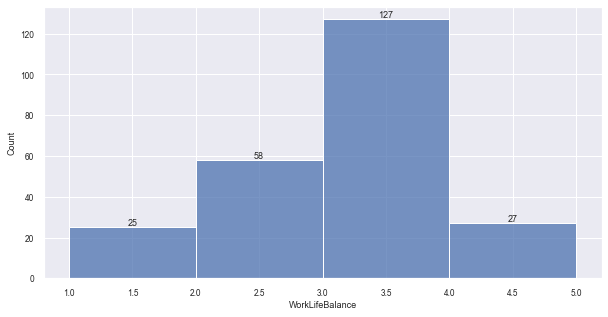

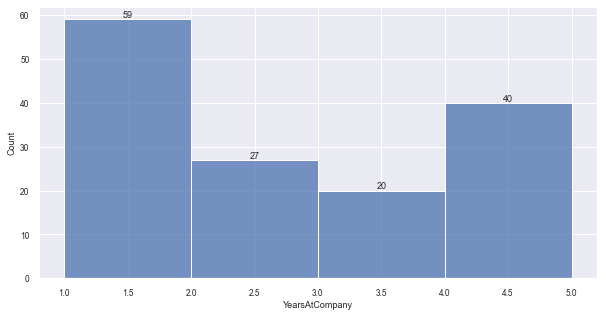

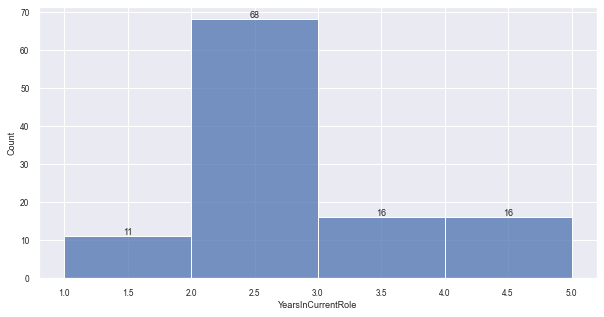

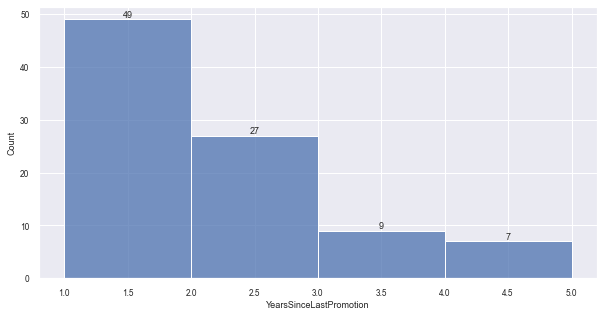

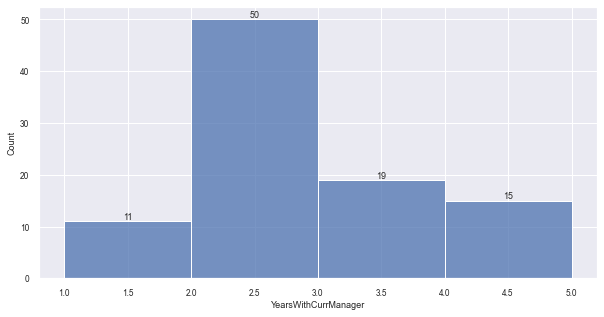

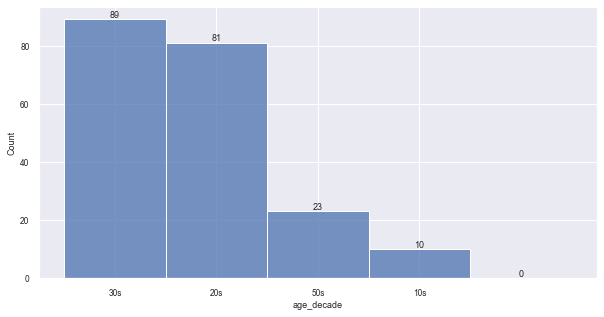

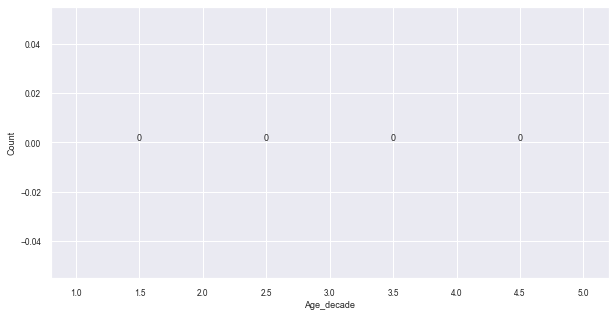

In [29]:
for col in data_left.columns:
    plt.figure(figsize=(10,5))
    sns.set_theme(style="darkgrid", font_scale = 0.75)
    ax = sns.histplot(data = data_left, x = col, binwidth = 1, binrange = (1,5),legend = True, palette = 'rocket')
    for i in ax.containers:
        ax.bar_label(i,)

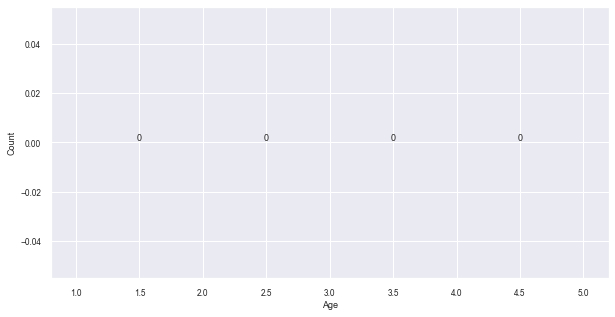

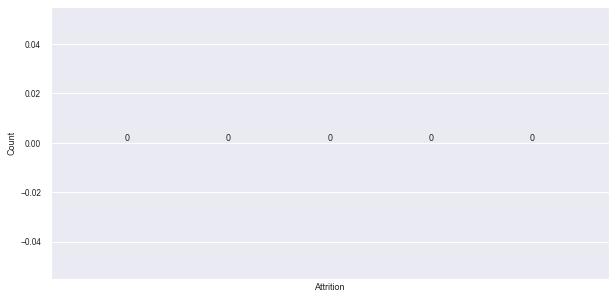

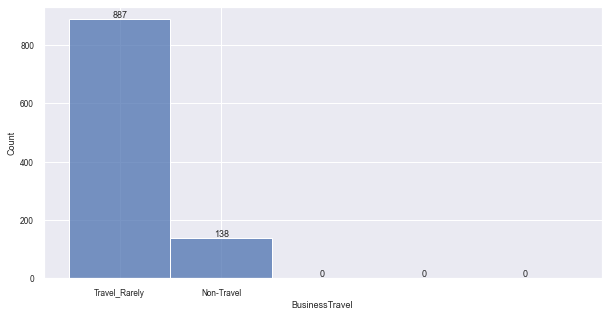

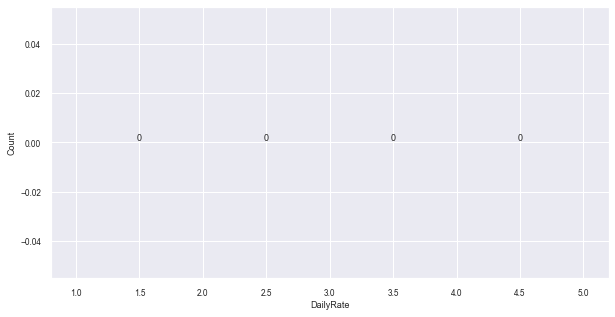

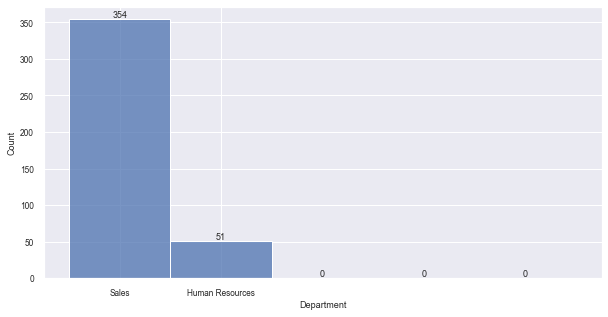

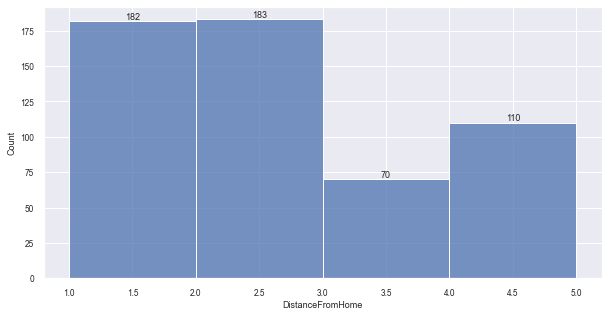

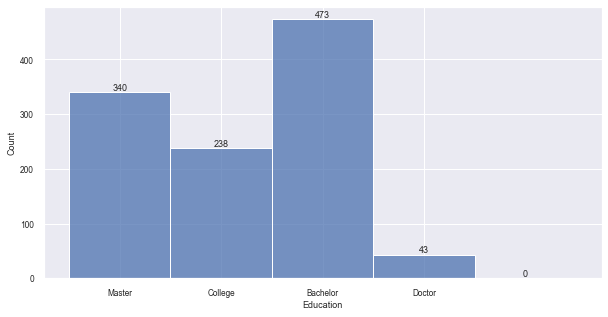

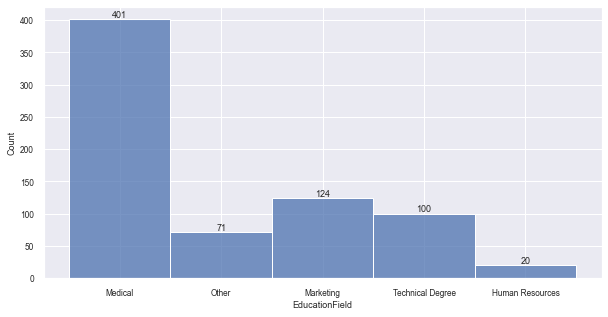

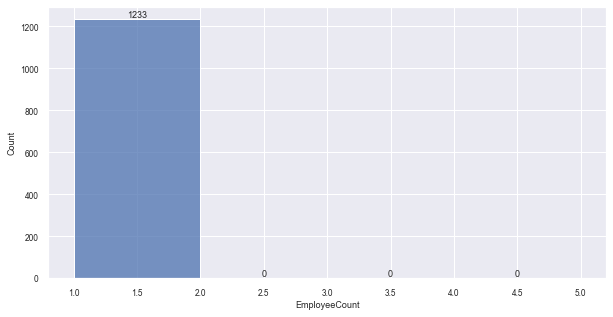

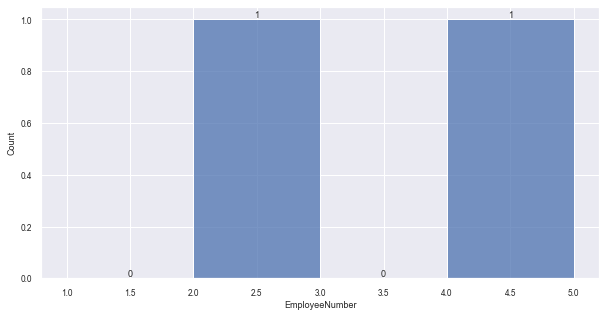

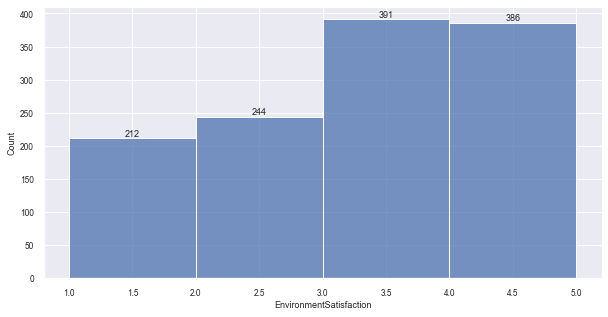

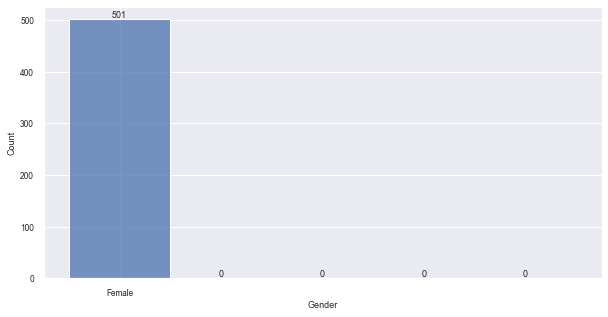

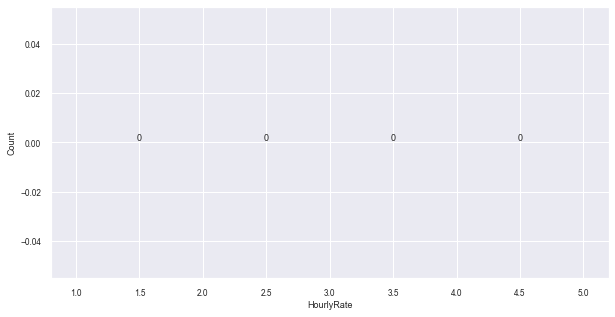

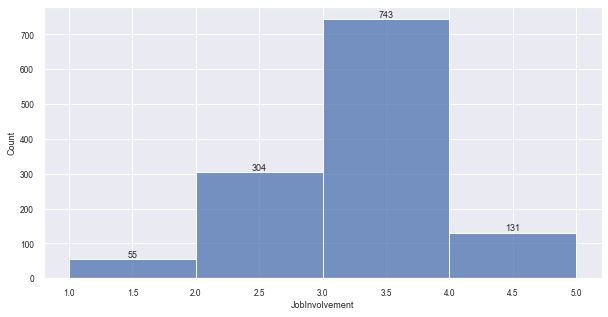

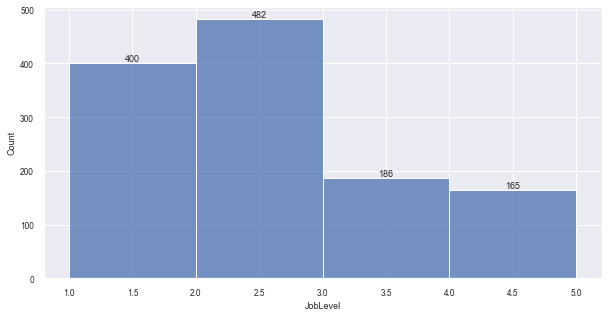

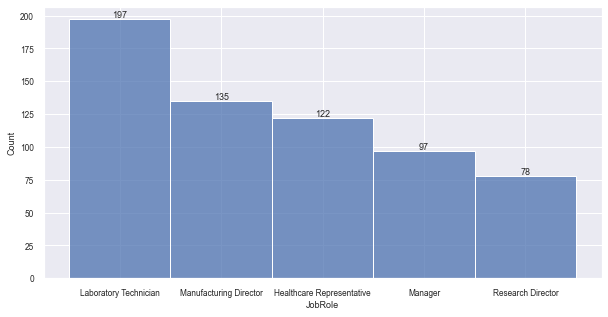

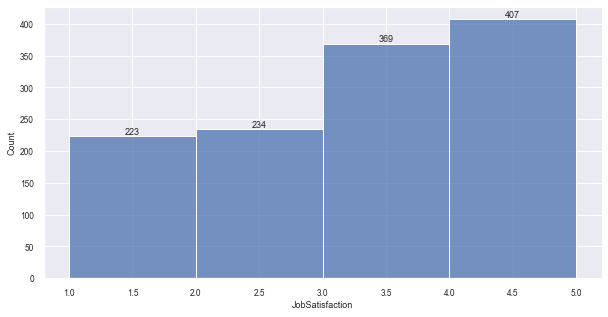

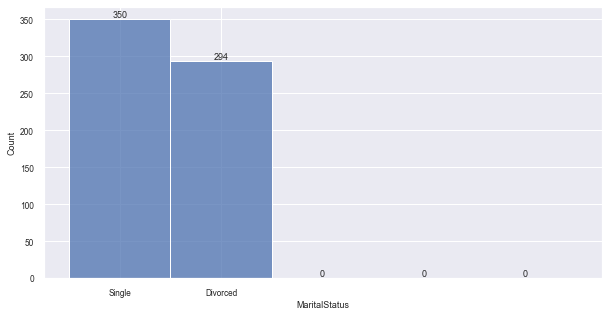

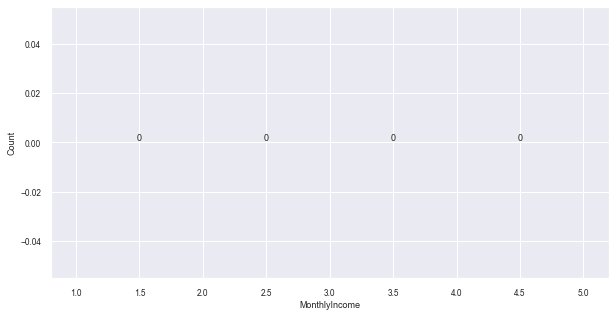

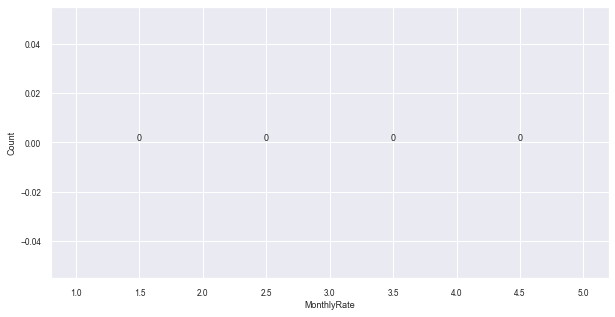

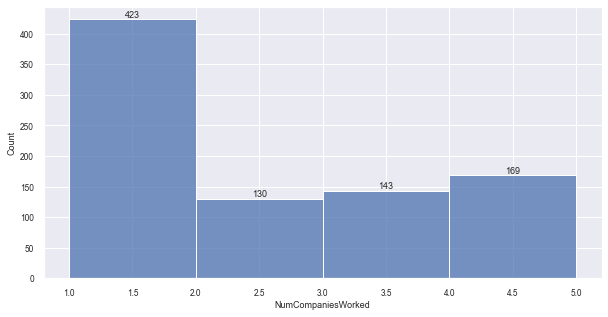

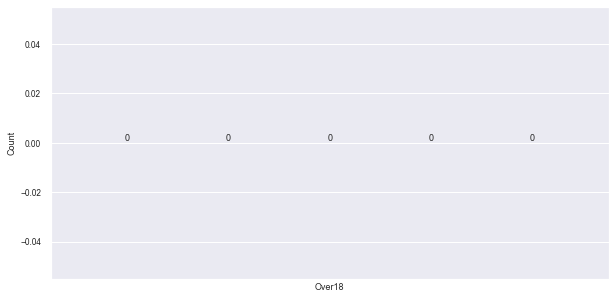

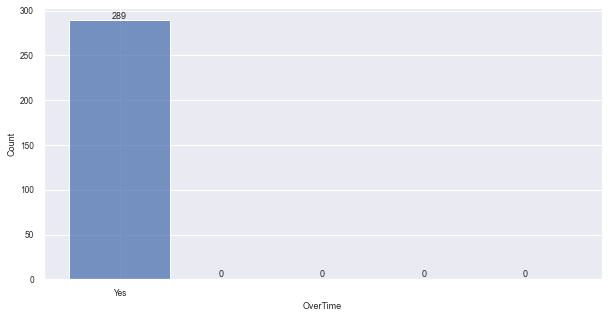

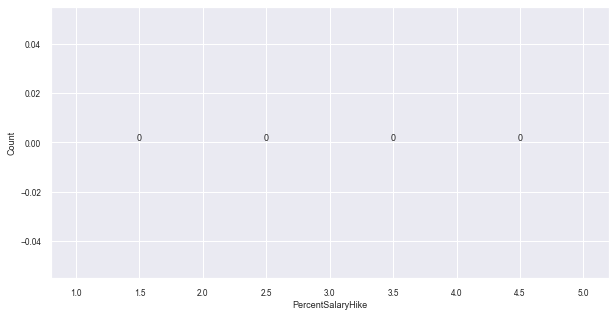

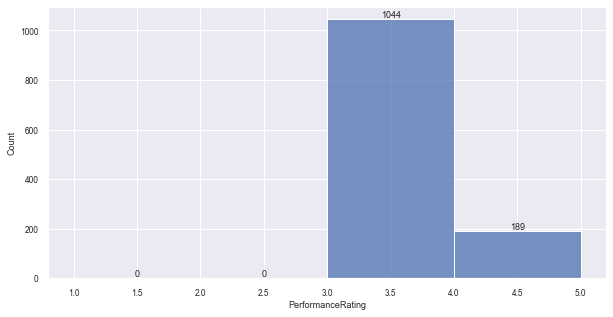

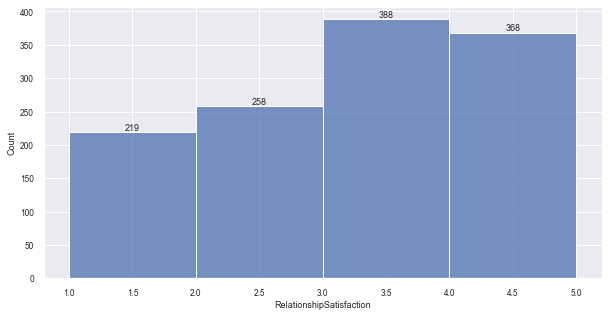

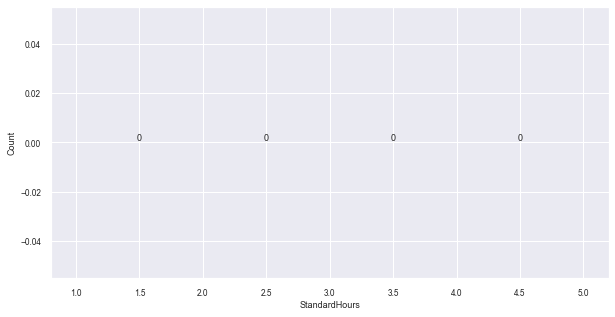

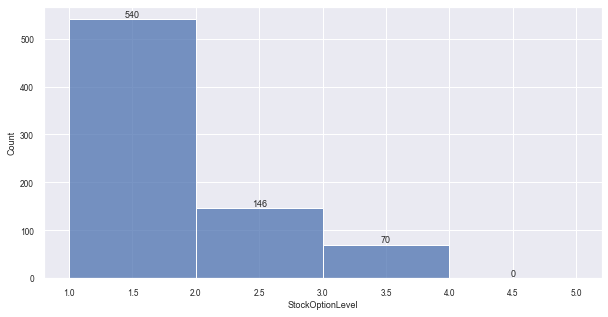

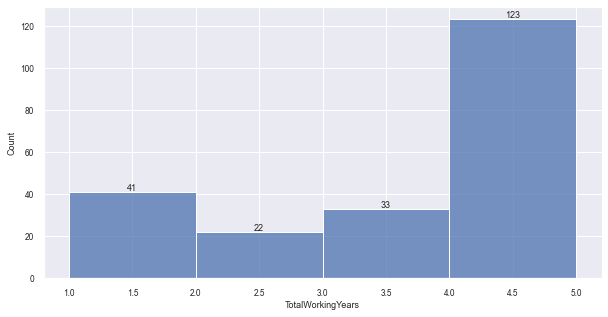

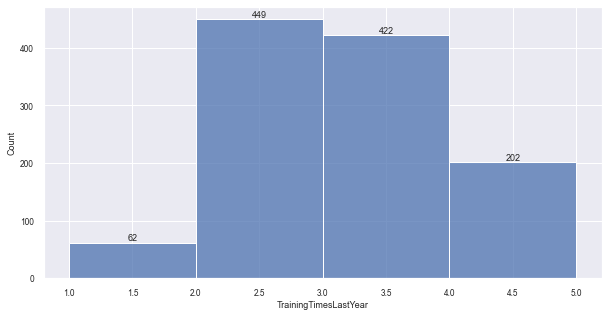

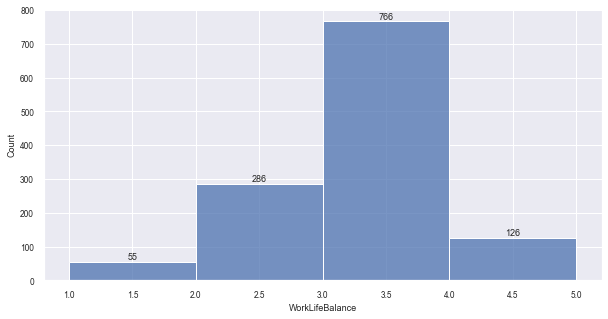

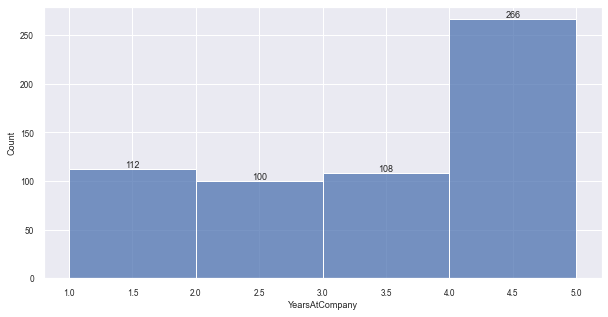

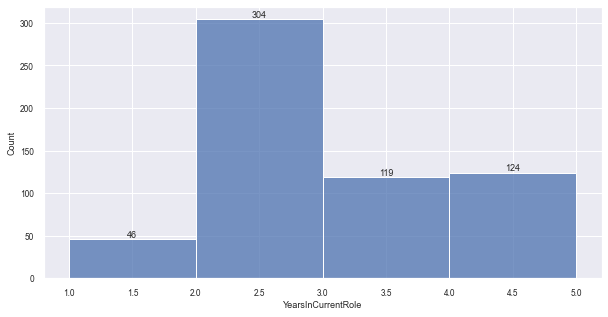

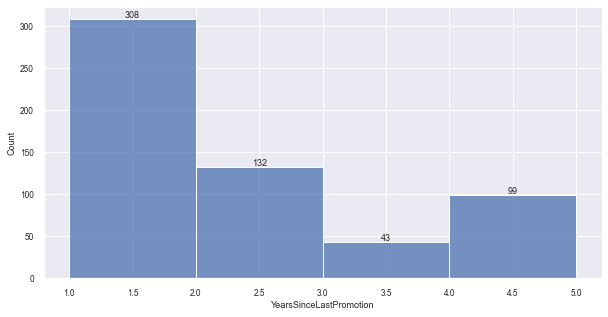

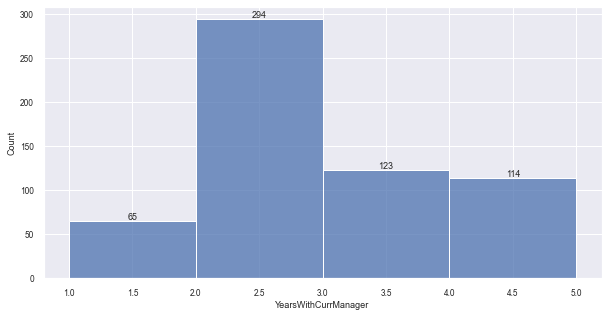

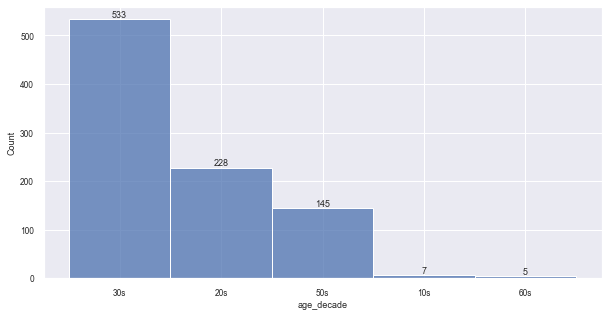

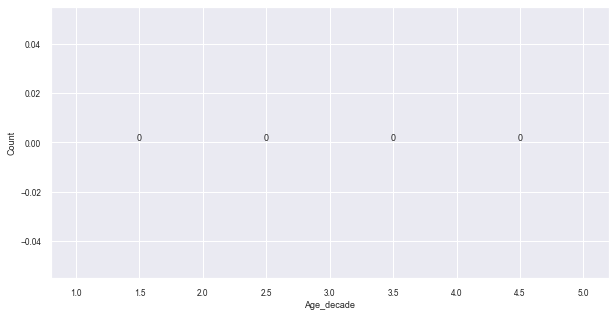

In [30]:
for col in data_present.columns:
    plt.figure(figsize=(10,5))
    sns.set_theme(style="darkgrid", font_scale = 0.75)
    ax = sns.histplot(data = data_present, x = col, binwidth = 1, binrange = (1,5),legend = True, palette = 'rocket')
    for i in ax.containers:
        ax.bar_label(i,)

After comparing the histograms for satisfaction levels for different factors of the employees at the company, the following can be concluded

-For the employees who didn't leave the organisation, the Job, Relationship, Environment satisfaction were largely above 3.
-For the employees who left the organisation, the Job, Relationship and Environment satisfaction were largely below 3.

We also find that the overall worklife balance at the company seems to be decent since no major trend can be seen in both the group of employees.

In [31]:
data["PerformanceRating"].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

The performance rating of the employees looks very good, so this factor can be excluded from the analysis.

In [32]:
data['WorkLifeBalance'].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

The worklife balance seems decent enough. 

Now, lets try to analyse overall Job Satisfaction

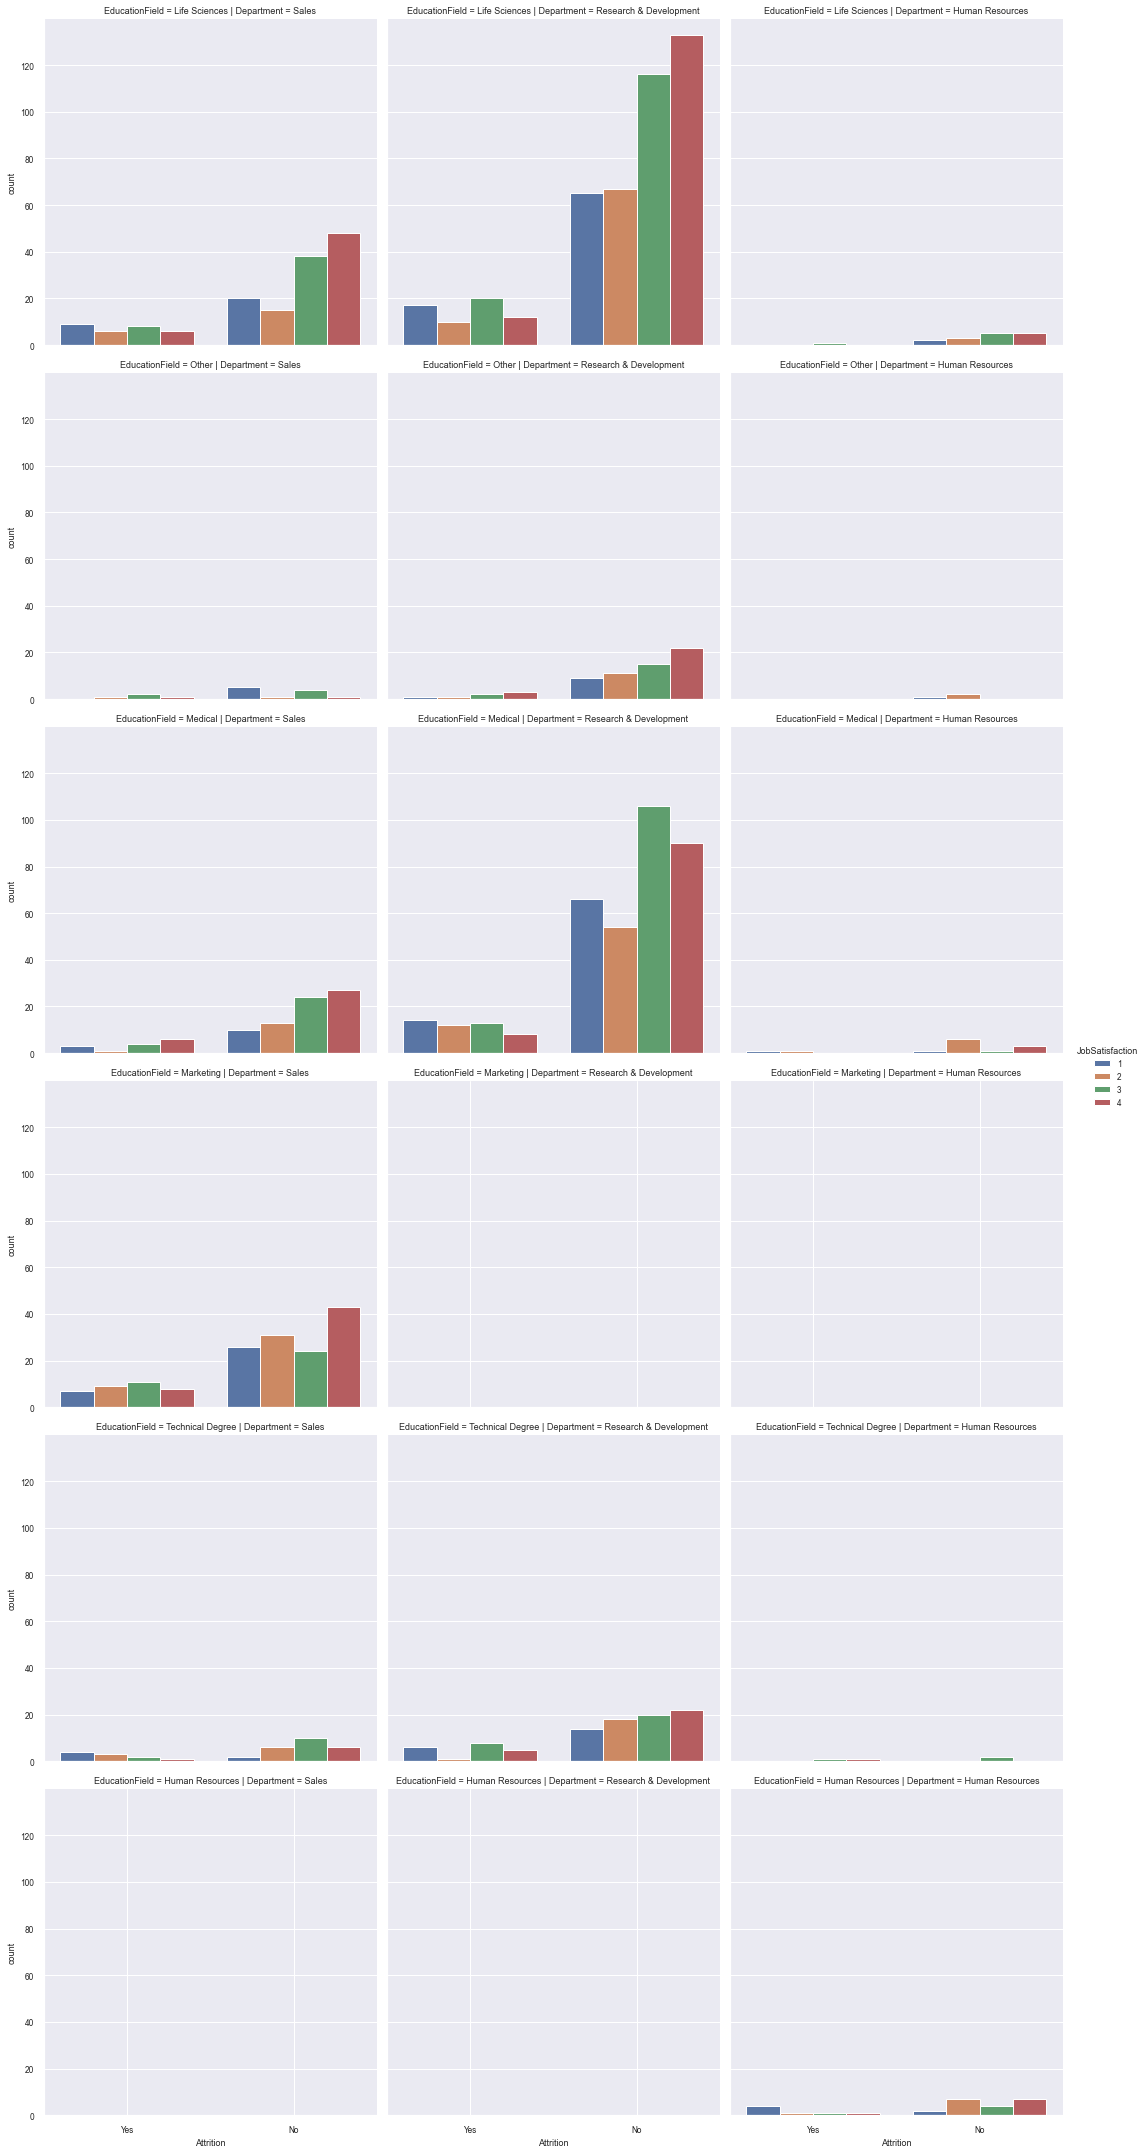

In [33]:
sns.set_theme(style="darkgrid", font_scale = 0.75)
g = sns.catplot(x = "Attrition",hue = 'JobSatisfaction', row = 'EducationField', col = 'Department', data = data, kind = 'count', ci = None)

In [43]:
data_presentJS = data_present.loc[data_present['JobSatisfaction'] < 2]
data_presentJS.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,age_decade,Age_decade
6,59,No,Travel_Rarely,1324,Research & Development,3,Bachelor,Medical,1,10,...,3,12,3,2,1,0,0,0,50s,50
15,29,No,Travel_Rarely,1389,Research & Development,21,Master,Life Sciences,1,20,...,1,10,1,3,10,9,8,8,20s,20
29,46,No,Travel_Rarely,705,Sales,2,Master,Marketing,1,38,...,0,22,2,2,2,2,2,1,40s,40
38,36,No,Travel_Rarely,852,Research & Development,5,Master,Life Sciences,1,51,...,1,6,3,4,1,1,0,0,30s,30
39,33,No,Travel_Frequently,1141,Sales,1,Bachelor,Life Sciences,1,52,...,2,10,3,3,5,3,1,3,30s,30


In [45]:
data_leftJS = data_left.loc[data_left['JobSatisfaction'] < 2]
data_leftJS.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,age_decade,Age_decade
21,36,Yes,Travel_Rarely,1218,Sales,9,Master,Life Sciences,1,27,...,0,10,4,3,5,3,0,3,30s,30
24,34,Yes,Travel_Rarely,699,Research & Development,6,Below College,Medical,1,31,...,0,8,2,3,4,2,1,3,30s,30
26,32,Yes,Travel_Frequently,1125,Research & Development,16,Below College,Life Sciences,1,33,...,0,10,5,3,10,2,6,7,30s,30
100,37,Yes,Travel_Rarely,807,Human Resources,6,Master,Human Resources,1,133,...,0,7,3,3,3,2,0,2,30s,30
140,32,Yes,Travel_Rarely,1033,Research & Development,9,Bachelor,Medical,1,190,...,0,10,2,4,5,4,0,4,30s,30


Now, we will try to find out insights on the employees whose jobsatisfaction is 1 and the possible reasons.

Checking Business Travel

In [46]:
data_presentJS['BusinessTravel'].value_counts(normalize = True)

Travel_Rarely        0.766816
Travel_Frequently    0.156951
Non-Travel           0.076233
Name: BusinessTravel, dtype: float64

In [47]:
data_leftJS['BusinessTravel'].value_counts(normalize = True)

Travel_Rarely        0.666667
Travel_Frequently    0.242424
Non-Travel           0.090909
Name: BusinessTravel, dtype: float64

Checking Distance from Home

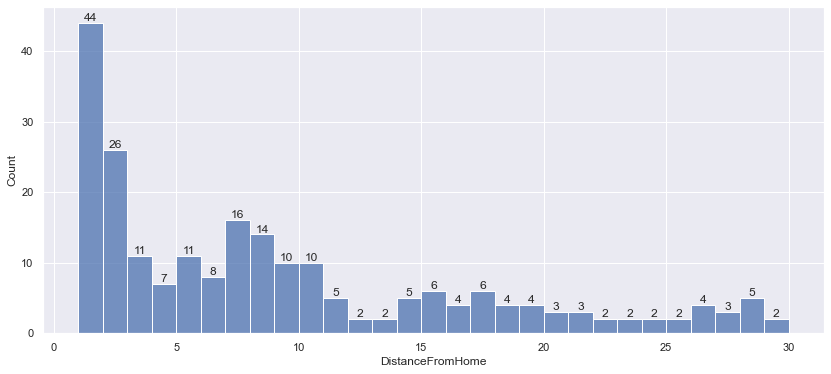

In [48]:
plt.figure(figsize=(14,6))
sns.set_theme(style = 'darkgrid', font_scale = 1)
ax = sns.histplot(data = data_presentJS, x = data_presentJS['DistanceFromHome'], binwidth = 1, binrange = (1,30), palette= 'rocket')
for i in ax.containers:
    ax.bar_label(i,)

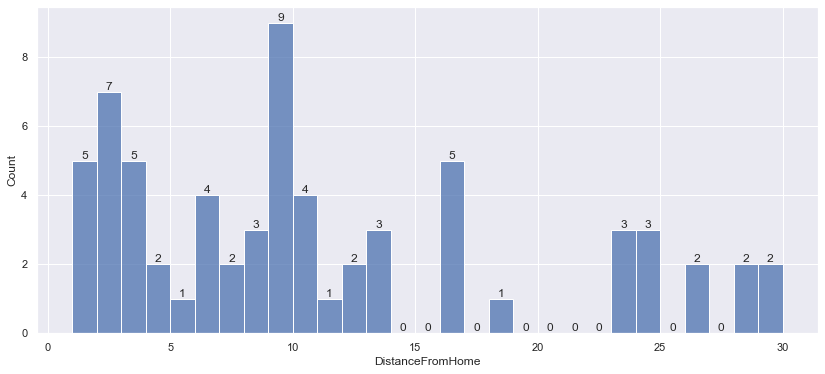

In [49]:
plt.figure(figsize=(14,6))
sns.set_theme(style = 'darkgrid', font_scale = 1)
ax = sns.histplot(data = data_leftJS, x = data_leftJS['DistanceFromHome'], binwidth = 1, binrange = (1,30), palette= 'rocket')
for i in ax.containers:
    ax.bar_label(i,)

It is clearly visible that the employees who didn't leave the company had to travel less from home and had job satisfaction less than 1. On the contrary the employees who left had to travel larger distances, which can be taken as a possible reason for lower job satisfaction. hence, they might have quit the company.

Checking Department

In [50]:
data_presentJS['Department'].value_counts(normalize = True)

Research & Development    0.690583
Sales                     0.282511
Human Resources           0.026906
Name: Department, dtype: float64

In [51]:
data_leftJS['Department'].value_counts(normalize = True)

Research & Development    0.575758
Sales                     0.348485
Human Resources           0.075758
Name: Department, dtype: float64

Checking Environment Satisfaction

In [52]:
data_presentJS['EnvironmentSatisfaction'].value_counts(normalize = True)

3    0.349776
4    0.318386
2    0.183857
1    0.147982
Name: EnvironmentSatisfaction, dtype: float64

In [53]:
data_leftJS['EnvironmentSatisfaction'].value_counts(normalize = True)

1    0.303030
3    0.242424
4    0.242424
2    0.212121
Name: EnvironmentSatisfaction, dtype: float64

We can see that 32% of the employees are the ones who didn't leave the company and with job satisfaction level less than 1 had Environment satisfaction less than 3.

On the otherhand, 50% of the employees are employees who left the company and with job satisfaction level less than 1 had Environment satisfaction of less than 3.

Checking Job Role

In [54]:
data_presentJS['JobRole'].value_counts(normalize = True)

Sales Executive              0.237668
Research Scientist           0.183857
Laboratory Technician        0.161435
Manufacturing Director       0.107623
Healthcare Representative    0.107623
Manager                      0.089686
Research Director            0.067265
Sales Representative         0.022422
Human Resources              0.022422
Name: JobRole, dtype: float64

In [55]:
data_leftJS['JobRole'].value_counts(normalize = True)

Laboratory Technician        0.303030
Sales Executive              0.242424
Research Scientist           0.196970
Sales Representative         0.106061
Human Resources              0.075758
Healthcare Representative    0.030303
Manufacturing Director       0.030303
Manager                      0.015152
Name: JobRole, dtype: float64

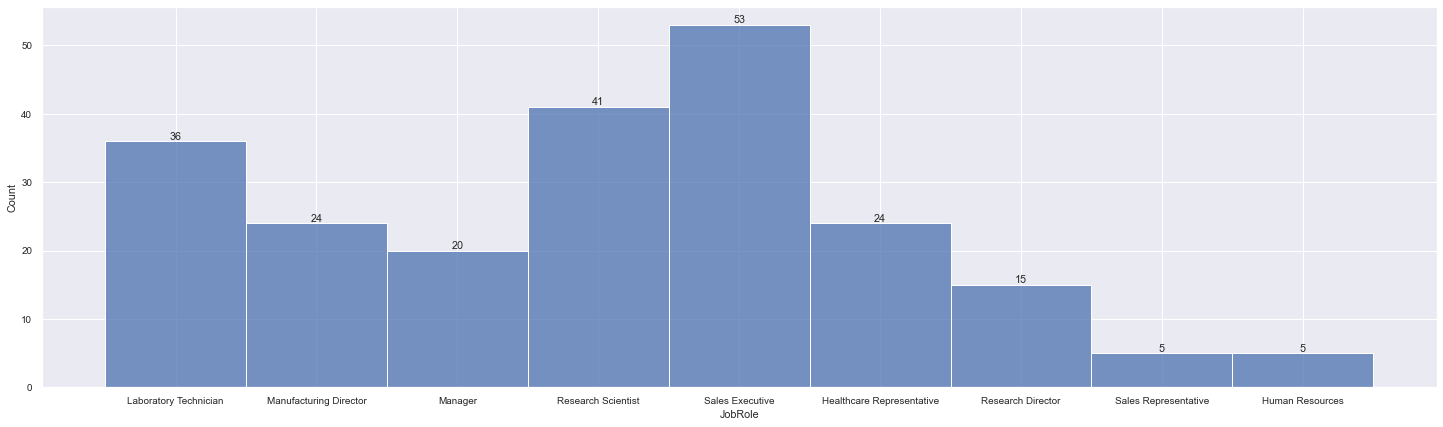

In [56]:
plt.figure(figsize=(25,7))
sns.set_theme(style = 'darkgrid', font_scale = .9)
ax = sns.histplot(data = data_presentJS, x = data_presentJS['JobRole'], palette= 'rocket')
for i in ax.containers:
    ax.bar_label(i,)

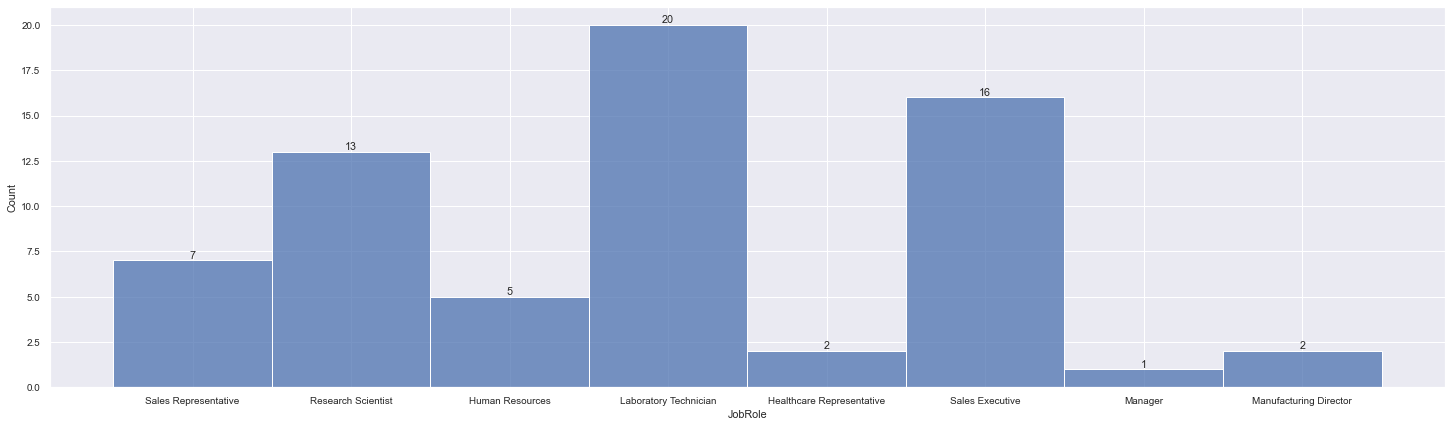

In [57]:
plt.figure(figsize=(25,7))
sns.set_theme(style = 'darkgrid', font_scale = .9)
ax = sns.histplot(data = data_leftJS, x = data_leftJS['JobRole'], palette= 'rocket')
for i in ax.containers:
    ax.bar_label(i,)

In [58]:
data_leftJS.groupby(['JobRole'])['EnvironmentSatisfaction'].value_counts(normalize=True)

JobRole                    EnvironmentSatisfaction
Healthcare Representative  2                          1.000000
Human Resources            2                          0.400000
                           1                          0.200000
                           3                          0.200000
                           4                          0.200000
Laboratory Technician      1                          0.450000
                           3                          0.250000
                           2                          0.150000
                           4                          0.150000
Manager                    4                          1.000000
Manufacturing Director     3                          0.500000
                           4                          0.500000
Research Scientist         1                          0.307692
                           4                          0.307692
                           3                          0.230769
    

We can see that almost 54% of the employees are with job satisfaction less than 1 and had left the company were mostly Laboratory Technician and Sales Executives. 

Even for those employees who had Job satisfaction less than 1 and who didn't leave the company, Lab technician and Sales Executives comprise of 40%.
60% of Lab Technicians are found to have environment satisfaction less than 3 and 56% of sales executives have enovironment satisfaction that is less than 3.

Therefore, it can be concluded that these two job roles are the least desired ones.

Also checking Years with current manager

In [59]:
data_presentJS['YearsWithCurrManager'].value_counts(normalize = True)

2     0.215247
7     0.156951
0     0.121076
3     0.116592
8     0.076233
4     0.062780
9     0.044843
1     0.040359
5     0.040359
10    0.026906
11    0.022422
12    0.022422
6     0.017937
13    0.013453
17    0.013453
16    0.008969
Name: YearsWithCurrManager, dtype: float64

In [60]:
data_leftJS['YearsWithCurrManager'].value_counts(normalize = True)

0     0.378788
2     0.227273
7     0.121212
3     0.090909
4     0.060606
14    0.030303
9     0.030303
1     0.015152
6     0.015152
10    0.015152
8     0.015152
Name: YearsWithCurrManager, dtype: float64

We see that more than 55% of the employees had left the company within 2 years with their current manager. So, we can say that these employees worked with managers who were not able to pass on the company ethos to their employees. Thus, there is need to track down these managers and provide them with necessary trainings.

We mostly found that the Sales executives and Lab technicians are huge as employees having the least job satisfaction. Thus, it is important to take necessary steps to offer them an improved environment to work in. 

Employees who need to travel longer to work tend to leave the company than others.

Conclusion:
From the above data we can find several variables which are ample to give us a detailed information about the question in project,i.e., how does HR Analytics help in analyzing attrition.